In [1]:
import os
import random
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from Config import apikey

In [2]:
# Testing Citipy
citipy.nearest_city(22.99, 120.21).city_name

'tainan'

In [3]:
latitude = []
longitude = []

for x in range(0,5000):
    latitude.append(random.uniform(-90, 90))
    longitude.append(random.uniform(-180, 180))

print(latitude, longitude)
cities = []

if len(latitude) == len(longitude):
    for x in range(0, len(latitude)):
        city = citipy.nearest_city(round(latitude[x], 6), round(longitude[x], 6))
        print(f"Searching: {round(latitude[x], 6)}, {round(longitude[x], 6)}")
        print(f"Found {city.city_name}!")
        print("----------------")
        cities.append([city.city_name, round(latitude[x], 6), round(longitude[x], 6)])

[-64.07923699931322, -47.38541815259824, 1.5963223645939877, -12.73577808854263, -71.67995592864334, -44.6989261259323, 0.007770764945348674, -80.35887341342793, -23.25189456564314, 19.568251946965205, 50.86446508765934, 49.47955996151535, -30.701487837588274, -45.9245211368911, 65.456389595238, -83.53858477495967, 66.02565206220999, -52.04778864784963, 6.768505254035929, -78.71358522631365, -86.62963658190269, 11.30255469611005, 62.637315436289185, 66.51347655463661, -48.664828833397955, -23.43146841707312, -52.234302221047216, -5.439326492556475, -48.91780679000436, 5.271394349109229, -34.04246548984364, -67.0394988661389, -15.720865063456614, 80.14017872285103, 25.132956682805528, 64.36662543354063, -17.112776003202427, -62.41216708024556, 73.35928142703597, 45.91155877286542, 9.443878584308052, -53.83253288336394, 69.05987038264448, 30.698786204310267, 23.906797626868837, -8.48174595029765, -13.55575199448272, -43.91242166508717, 39.181604025350595, -24.639234950939866, -11.4609395

In [6]:
df = pd.DataFrame(cities)
df = df.drop_duplicates(subset=0, keep=False)
df[0].value_counts()
# Table Manipulation
df = df.rename(columns={0:'City Name', 1:"Latitude", 2:"Longitude"})
df = df.reset_index()
df = df.drop(columns=['index'])
test_df = df.head(5).copy()
len(df)

1001

In [7]:
test_df.head(5)

,City Name,Latitude,Longitude
0,takoradi,0.007771,-0.126659
1,chingirlau,49.479560,53.468520
2,batagay,65.456390,134.717253
3,berbera,11.302555,44.308438
4,jacareacanga,-5.439326,-56.907933


In [8]:
df

,City Name,Latitude,Longitude
0,takoradi,0.007771,-0.126659
1,chingirlau,49.479560,53.468520
2,batagay,65.456390,134.717253
3,berbera,11.302555,44.308438
4,jacareacanga,-5.439326,-56.907933
...,...,...,...
996,malindi,-2.689279,39.327467
997,ostersund,61.901541,15.104584
998,gari,59.151671,62.207201
999,ocean city,38.896795,-74.470559


In [9]:
## API Start!
df['Temperature'] = 0.0
df['Humidity'] = 0.0
df['Cloudiness'] = 0.0
df['Wind Speed'] = 0.0
df['City ID'] = np.nan

In [10]:
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID
0,takoradi,0.007771,-0.126659,0.0,0.0,0.0,0.0,NaN
1,chingirlau,49.479560,53.468520,0.0,0.0,0.0,0.0,NaN
2,batagay,65.456390,134.717253,0.0,0.0,0.0,0.0,NaN
3,berbera,11.302555,44.308438,0.0,0.0,0.0,0.0,NaN
4,jacareacanga,-5.439326,-56.907933,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
996,malindi,-2.689279,39.327467,0.0,0.0,0.0,0.0,NaN
997,ostersund,61.901541,15.104584,0.0,0.0,0.0,0.0,NaN
998,gari,59.151671,62.207201,0.0,0.0,0.0,0.0,NaN
999,ocean city,38.896795,-74.470559,0.0,0.0,0.0,0.0,NaN


In [11]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Build the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
lat = ''
lon = ''
query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"


for i, row in df.iterrows():
    c = row['City Name']
    lat = row['Latitude']
    lon = row['Longitude']
    query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"
    response = requests.get(query_url + f"&appid={apikey}").json()
    df.at[i, 'Humidity'] = response['main']['humidity']
    df.at[i, 'Temperature'] = response['main']['temp']
    df.at[i, 'Cloudiness'] = response['clouds']['all']
    df.at[i, 'Wind Speed'] = response['wind']['speed']
    if response['id'] > 0:
        df.at[i, 'City ID'] = response['id']
        print(f"City:{response['name']} w/ City ID:{response['id']} found!")
    else:
        print(f"**** No city found, delete this row! ****")
        
print("Api calls are completed!")

City:Globe w/ City ID:6295630 found!
City:Saule w/ City ID:608422 found!
**** No city found, delete this row! ****
City:Lughaye w/ City ID:54746 found!
City:Caresalzinho w/ City ID:3402916 found!
City:Kampung Tabanac w/ City ID:1742350 found!
City:Spanish Fort w/ City ID:4091136 found!
City:Togatax w/ City ID:1279873 found!
City:South Molton w/ City ID:2637373 found!
**** No city found, delete this row! ****
City:Mīnāb w/ City ID:123941 found!
City:East Glacier Park w/ City ID:5650243 found!
City:Rakke vald w/ City ID:7522421 found!
City:Eloy w/ City ID:5294167 found!
**** No city found, delete this row! ****
City:Zahedan w/ City ID:1159301 found!
City:Kaabong w/ City ID:233093 found!
City:Kamenka w/ City ID:553609 found!
City:Doba w/ City ID:2433437 found!
City:Catamarca Province w/ City ID:3862286 found!
City:Tanjung Pinang w/ City ID:1624863 found!
City:Kembé w/ City ID:238373 found!
City:Törtel w/ City ID:3043758 found!
City:Colatina w/ City ID:3465944 found!
City:Morovis w/ City I

In [14]:
df['City ID'].value_counts()

2023426    1
3458397    1
933178     1
4255948    1
4566334    1
          ..
2437797    1
2038438    1
109224     1
7910058    1
7839742    1
Name: City ID, Length: 829, dtype: int64

In [13]:
df.drop_duplicates(subset=['City ID'], keep='first', inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df['City ID'] = df['City ID'].astype(int)
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID
0,takoradi,0.007771,-0.126659,75.52,73.0,52.0,14.79,6295630
1,chingirlau,49.479560,53.468520,81.19,28.0,72.0,6.62,608422
3,berbera,11.302555,44.308438,85.98,78.0,100.0,9.51,54746
4,jacareacanga,-5.439326,-56.907933,89.91,41.0,41.0,1.83,3402916
5,lahad datu,5.271394,118.106350,71.47,97.0,71.0,1.90,1742350
...,...,...,...,...,...,...,...,...
996,malindi,-2.689279,39.327467,72.61,79.0,40.0,18.10,400740
997,ostersund,61.901541,15.104584,63.28,75.0,76.0,5.12,2661886
998,gari,59.151671,62.207201,54.18,71.0,53.0,1.25,1491267
999,ocean city,38.896795,-74.470559,84.49,86.0,19.0,16.06,4503313


In [15]:
north_df = df.loc[df['Latitude'] >= 0]
south_df = df.loc[df['Latitude'] < 0]

In [ ]:
col = 3
name = "Temperature (F)"

In [30]:
# Make a thing that can scatterplot on repeat
graph_list = ['Temperature', "Humidity", 'Cloudiness', 'Wind Speed']

def scatterPlotIt(col, name, df, hem_name):
    x = df
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.iloc[:,col], x.iloc[:,1])
    regress_values = x.iloc[:,1] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept, 2))
    cc = st.pearsonr(x.iloc[:,col], x.iloc[:,1])
    plt.scatter(x.iloc[:,1], x.iloc[:,col], facecolors="red", edgecolors="black", alpha=.8)
    plt.grid()
    plt.xlabel(f"Latitude")
    plt.ylabel(f"{name}")
    if hem_name == 0:
        plt.title(f"{name} vs Latitude in The Northern Hemisphere")
    if hem_name == 1:
        plt.title(f"{name} vs Latitude in The Southern Hemisphere")
    ymin = x.iloc[:,col].min()
    xmin = x.iloc[:,1].min()
    ymax = x.iloc[:,col].max()
    xmax = x.iloc[:,1].max()
    plt.ylim(ymin - 2, ymax + 7)
#     plt.annotate(line_eq, (xmin + 1,ymin - 3))
    plt.annotate(line_eq, (xmin + 1,ymax + 3))
#     plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (1, 1))
    plt.show()



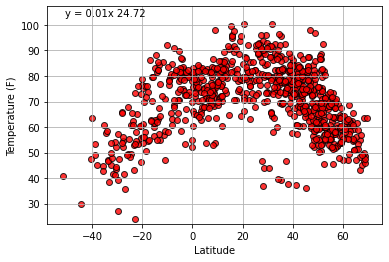

In [31]:
scatterPlotIt(3, "Temperature (F)", df, 99)

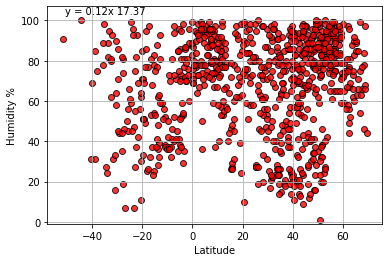

In [32]:
scatterPlotIt(4, "Humidity %", df, 99)

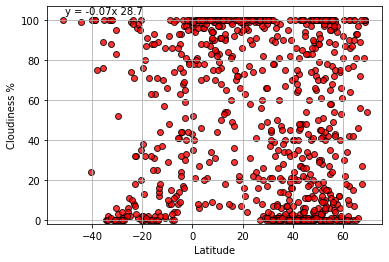

In [33]:
scatterPlotIt(5, "Cloudiness %", df, 99)

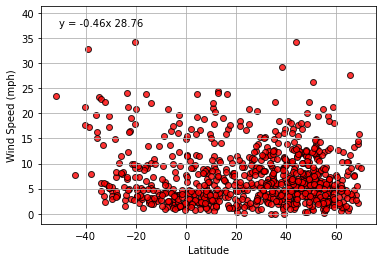

In [34]:
scatterPlotIt(6, "Wind Speed (mph)", df, 99)

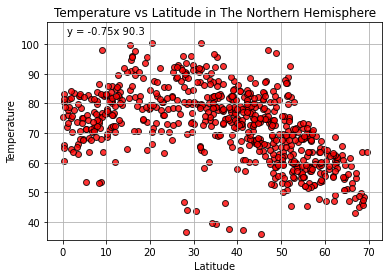

In [35]:
scatterPlotIt(3, graph_list[0], north_df, 0)

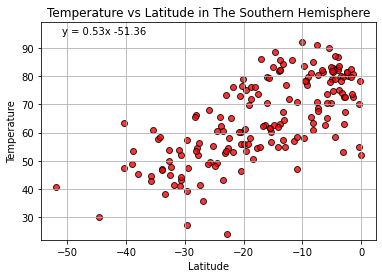

In [36]:
scatterPlotIt(3, graph_list[0], south_df, 1)

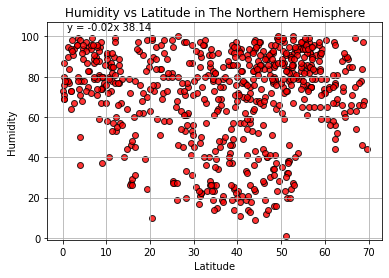

In [37]:
scatterPlotIt(4, graph_list[1], north_df, 0)

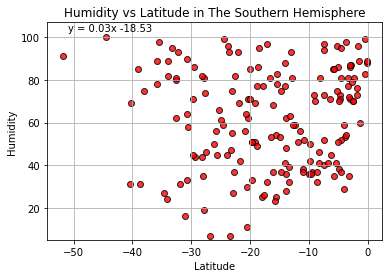

In [38]:
scatterPlotIt(4, graph_list[1], south_df, 1)

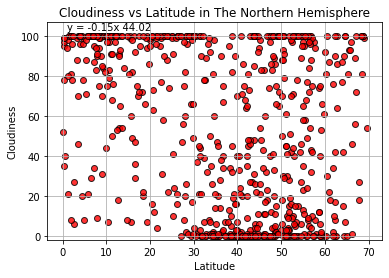

In [39]:
scatterPlotIt(5, graph_list[2], north_df, 0)

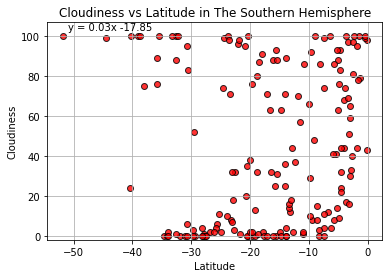

In [40]:
scatterPlotIt(5, graph_list[2], south_df, 1)

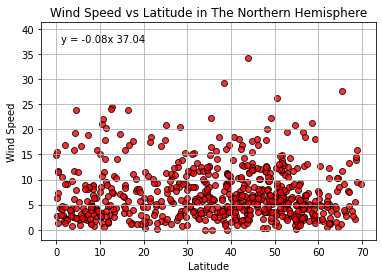

In [41]:
scatterPlotIt(6, graph_list[3], north_df, 0)

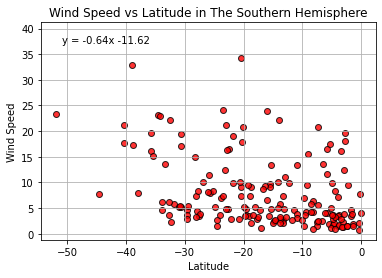

In [42]:
scatterPlotIt(6, graph_list[3], south_df, 1)